In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

In [2]:
filepath = '/Users/thananpornsethjinda/Desktop/internship/ml/classification/breast_cancer/data.csv'

raw_data = pd.read_csv(filepath)

### Simple sanity check of the data

In [3]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
raw_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### data-inherent/global data cleaning

In [38]:
## data cleaning frame work 

def clean_dataframe(df: pd.DataFrame, verbose: bool = True) -> pd.DataFrame:
    df = df.copy()

    # log helper
    def log(msg):
        if verbose:
            print(f"[INFO] {msg}")

    # 1. standardize column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    log("Standardized column names.")

    # 2. remove exact duplicates
    dup_count = df.duplicated().sum()
    if dup_count > 0:
        df.drop_duplicates(inplace=True)
        log(f"Removed {dup_count} duplicate rows.")

    # 3. trim and lowercase all string (object) values
    for col in df.select_dtypes(include='object'):
        df[col] = df[col].astype(str).str.strip().str.lower()
    log("Standardized string columns (lowercase + trimmed).")

    # 4. detect missing values (including blanks and placeholders)
    placeholder_values = ['n/a', 'na', '--', '-', 'none', 'null', '', 'nan']
    df.replace(placeholder_values, np.nan, inplace=True)
    null_report = df.isnull().sum()
    null_report = null_report[null_report > 0]
    if not null_report.empty:
        log(f"Missing values found in columns:\n{null_report}")

    # 5. flag constant columns
    constant_cols = [col for col in df.columns if df[col].nunique() == 1]
    if constant_cols:
        log(f"Constant columns (consider removing): {constant_cols}")

    # 6. flag high cardinality categorical columns
    high_card_cols = [col for col in df.select_dtypes(include='object') if df[col].nunique() > 100]
    if high_card_cols:
        log(f"High-cardinality columns (consider encoding strategies): {high_card_cols}")

    # 7. detect numeric outliers using IQR
    num_cols = df.select_dtypes(include=np.number).columns
    outlier_report = {}
    for col in num_cols:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
        if outliers > 0:
            outlier_report[col] = outliers
    if outlier_report:
        log(f"Potential numeric outliers detected:\n{outlier_report}")
    
    # 8. convert applicable columns to category
    for col in df.select_dtypes(include='object'):
        n_unique = df[col].nunique()
        if n_unique < len(df) * 0.05:
            df[col] = df[col].astype('category')
    log("Converted suitable object columns to category dtype.")

    log("Data cleaning complete.")
    return df

## study this function later 

In [41]:
cleaned_data = clean_dataframe(raw_data)

[INFO] Standardized column names.
[INFO] Standardized string columns (lowercase + trimmed).
[INFO] Missing values found in columns:
unnamed:_32    569
dtype: int64
[INFO] Potential numeric outliers detected:
{'id': np.int64(81), 'radius_mean': np.int64(14), 'texture_mean': np.int64(7), 'perimeter_mean': np.int64(13), 'area_mean': np.int64(25), 'smoothness_mean': np.int64(6), 'compactness_mean': np.int64(16), 'concavity_mean': np.int64(18), 'concave_points_mean': np.int64(10), 'symmetry_mean': np.int64(15), 'fractal_dimension_mean': np.int64(15), 'radius_se': np.int64(38), 'texture_se': np.int64(20), 'perimeter_se': np.int64(38), 'area_se': np.int64(65), 'smoothness_se': np.int64(30), 'compactness_se': np.int64(28), 'concavity_se': np.int64(22), 'concave_points_se': np.int64(19), 'symmetry_se': np.int64(27), 'fractal_dimension_se': np.int64(28), 'radius_worst': np.int64(17), 'texture_worst': np.int64(5), 'perimeter_worst': np.int64(15), 'area_worst': np.int64(35), 'smoothness_worst': np

In [49]:
cleaned_data.drop(['id', 'unnamed:_32'], axis=1, inplace=True)

In [51]:
cleaned_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,m,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,m,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,m,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,m,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,m,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,m,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,m,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,m,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,m,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### EDA

In [53]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave_points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

In [77]:
cleaned_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


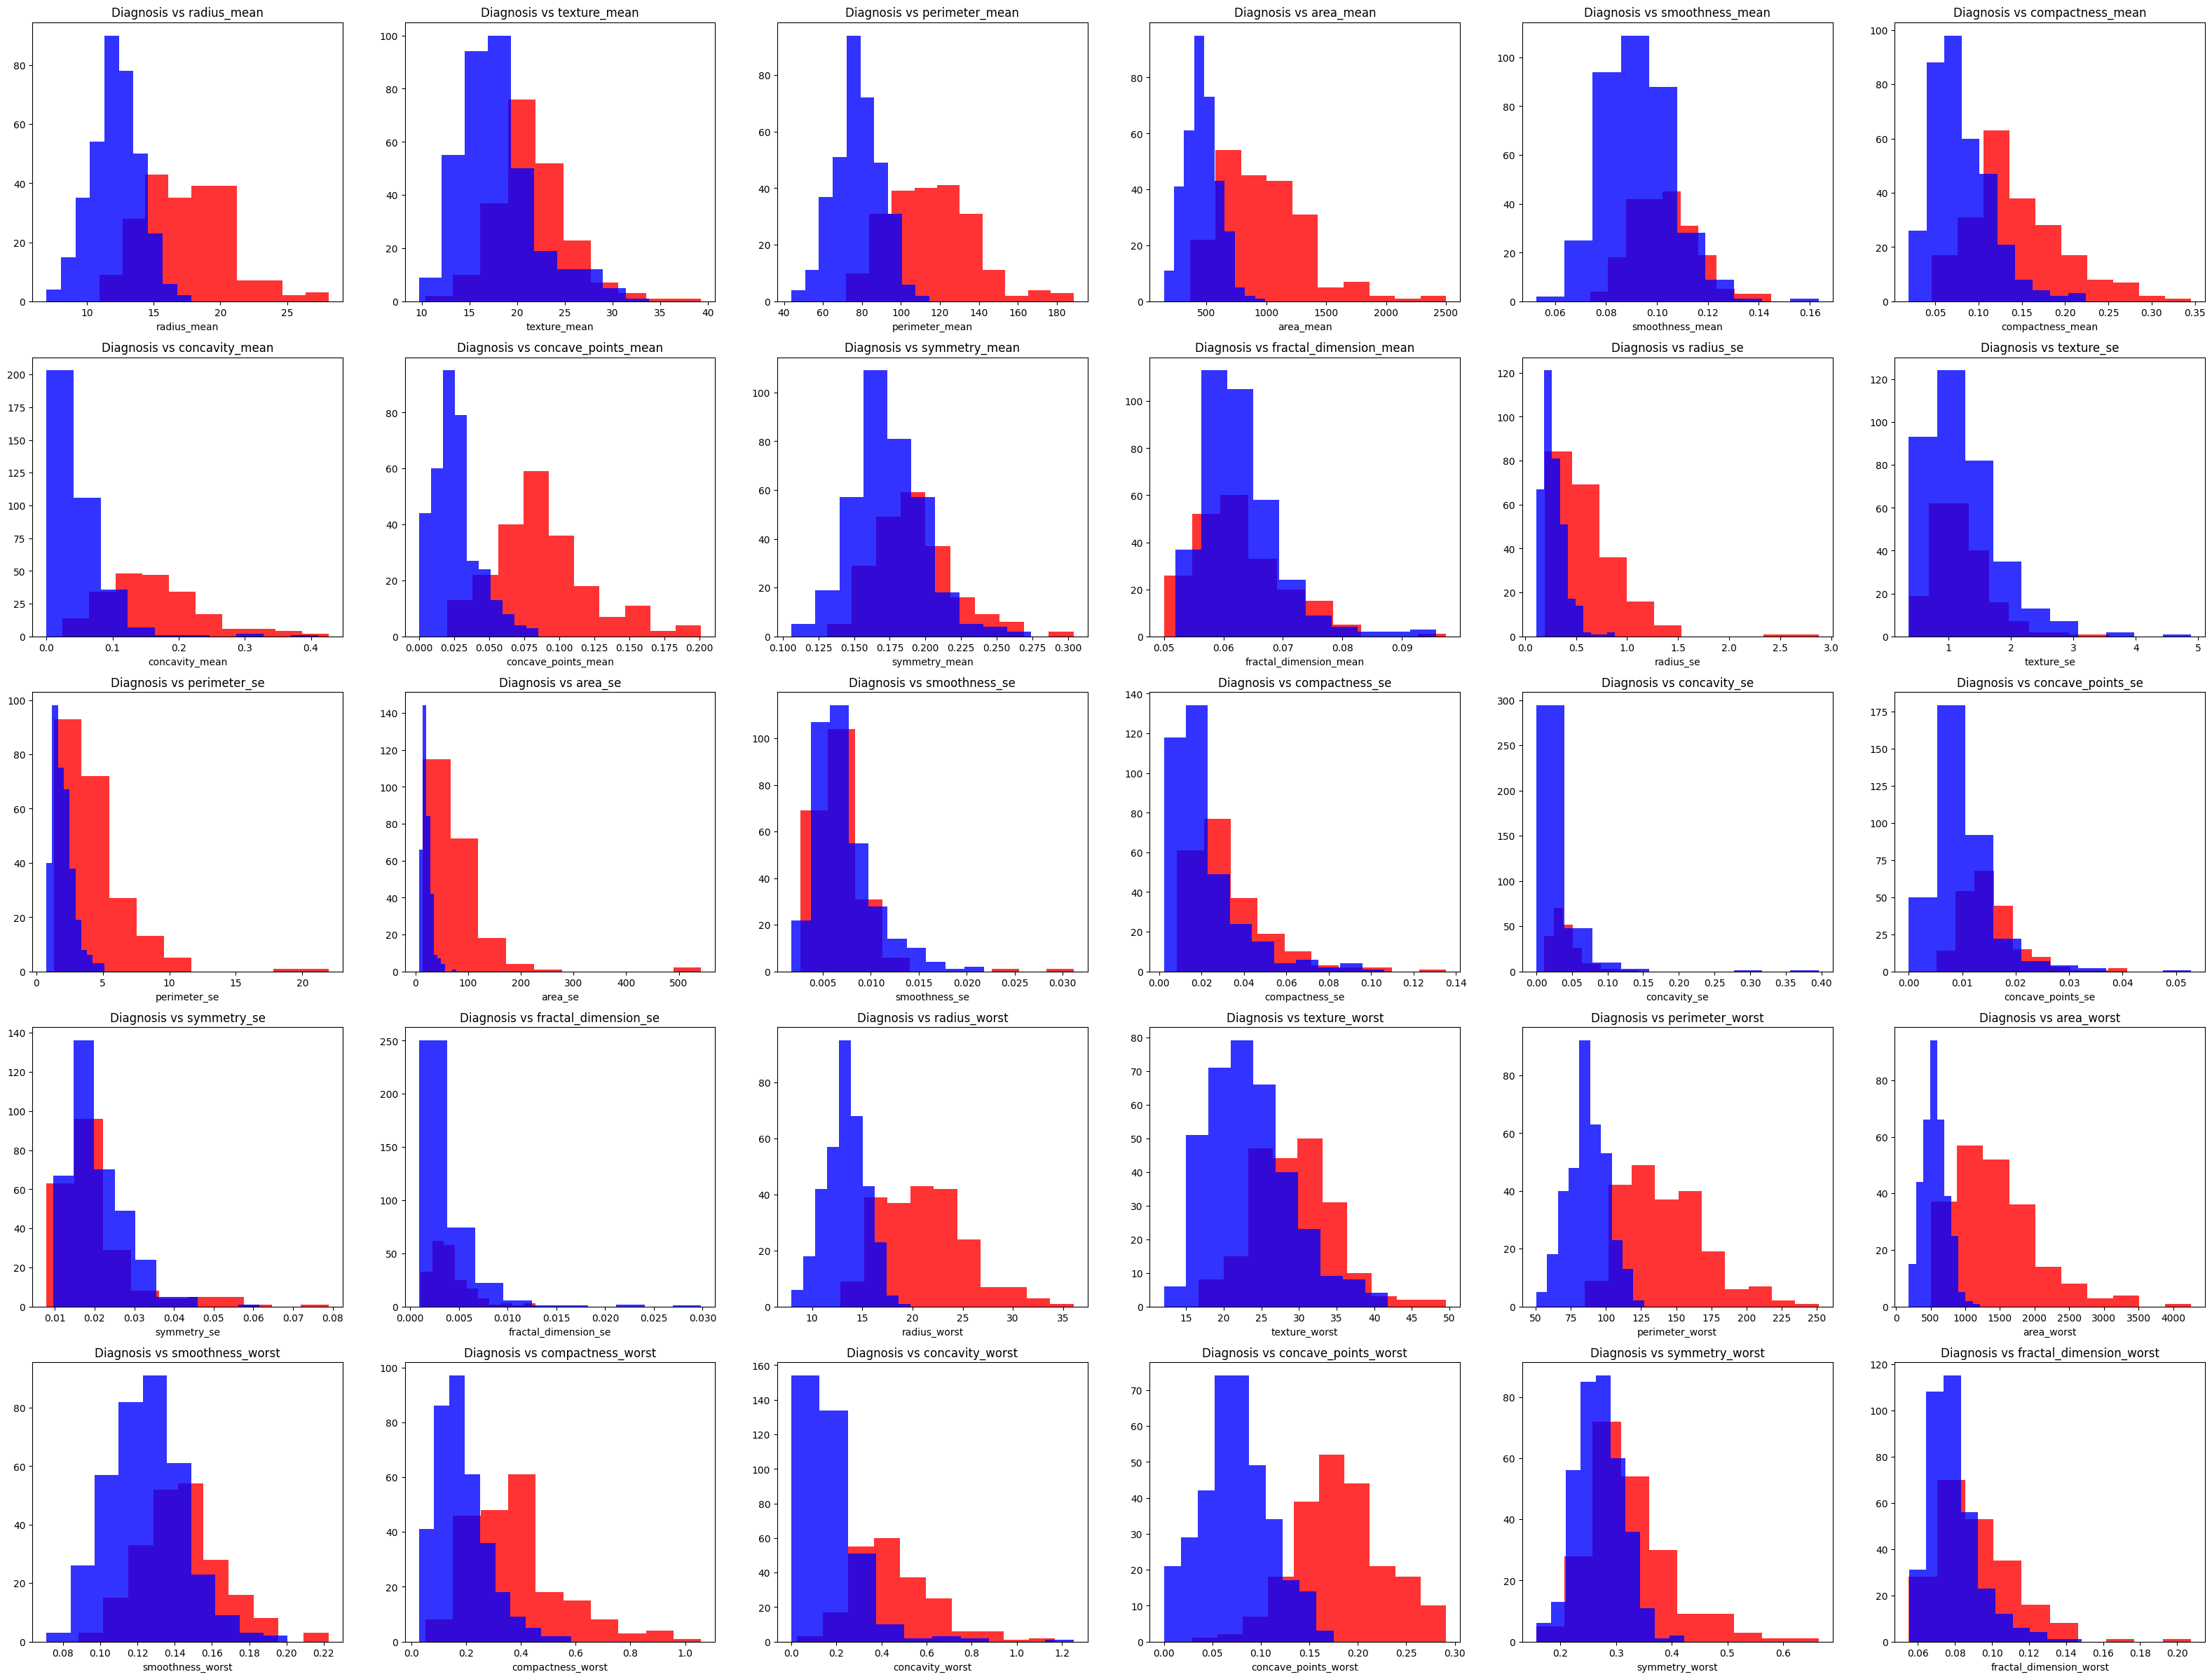

In [59]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(40,30))

column_number = 0

for i in range(5):
    for j in range(6): 
        axes[i][j].hist(cleaned_data[cleaned_data['diagnosis'] == 'm'][cleaned_data.columns[1:][column_number]], color='red', alpha=0.8)
        axes[i][j].hist(cleaned_data[cleaned_data['diagnosis'] == 'b'][cleaned_data.columns[1:][column_number]], color='blue', alpha=0.8)
        axes[i][j].set_title(f"Diagnosis vs {cleaned_data.columns[1:][column_number]}")
        axes[i][j].set_xlabel(cleaned_data.columns[1:][column_number])
        column_number += 1

plt.show()


In [60]:
fig = px.histogram(raw_data, 
                   x = 'diagnosis', 
                   title='Count of malignant and benign diagnoses', 
                   color_discrete_map={
                       'B':'blue',
                       'M':'red'
                   }, 
                   color='diagnosis'
                   )

fig.show()

<Axes: >

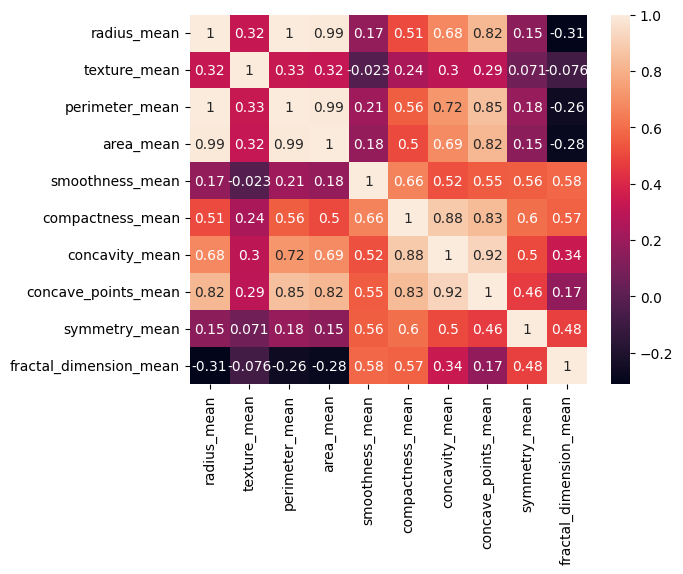

In [69]:
(cleaned_data.iloc[:, 1:11]).corr()

sns.heatmap((cleaned_data.iloc[:, 1:11]).corr(), annot=True)

<Axes: >

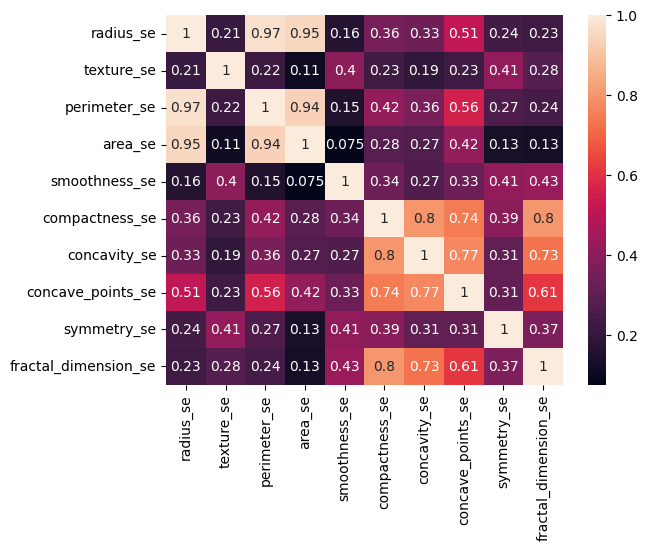

In [75]:
sns.heatmap((cleaned_data.iloc[:, 11:21]).corr(), annot=True)

<Axes: >

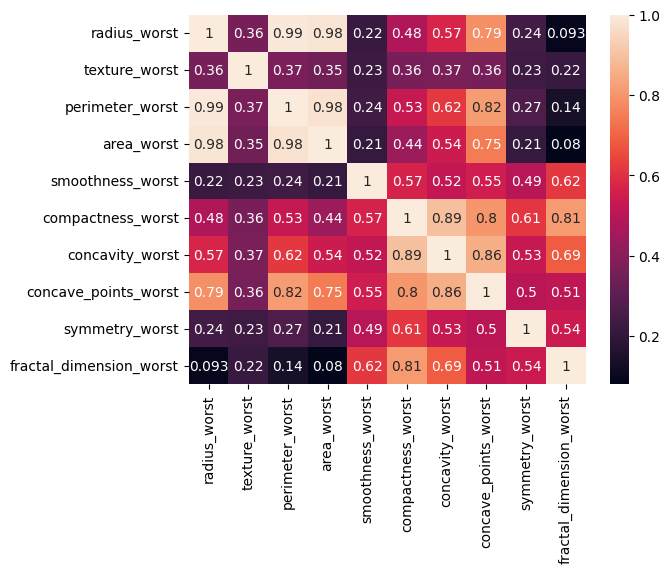

In [76]:
sns.heatmap((cleaned_data.iloc[:, 21:]).corr(), annot=True)

### training, validation, and test sets

In [78]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(cleaned_data, test_size = 0.1, random_state = 42)

train_df, val_df = train_test_split(train_val_df, test_size=0.1, random_state=42)

In [80]:
print(f"train_df:", train_df.shape)
print(f"val_df:", val_df.shape)
print(f"test_df:", test_df.shape)

train_df: (460, 31)
val_df: (52, 31)
test_df: (57, 31)


### identifying input and target columns

In [84]:
input_cols = list(cleaned_data.columns)[1:]

target_col = 'diagnosis'

In [85]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [86]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [87]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

### standardisation 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_inputs[input_cols] = scaler.fit_transform(train_inputs[input_cols])

val_inputs[input_cols] = scaler.transform(val_inputs[input_cols])

test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

train_inputs

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
510,-0.690871,-1.093720,-0.657610,-0.656656,-1.055214,-0.142386,-0.275261,-0.576521,-1.136430,0.703462,...,-0.805524,-1.343295,-0.790800,-0.719485,-1.051251,0.153183,-0.024053,-0.143900,-0.490368,0.809538
290,0.059730,0.098212,0.148320,-0.030690,-0.591319,1.227668,0.602306,0.451260,-0.349943,1.319751,...,-0.122882,-0.597897,-0.183007,-0.214052,-1.370615,-0.051984,-0.251128,-0.196964,-1.021301,0.220646
105,-0.305731,-0.887970,-0.212141,-0.366764,3.090928,1.399432,1.504823,1.229034,0.421912,2.029760,...,-0.011850,-0.553469,-0.043319,-0.110899,2.321947,0.987915,1.756797,1.266078,0.377994,3.083861
470,-1.273641,-0.195041,-1.263284,-1.037521,-0.458073,-0.799140,-0.756178,-0.868283,1.566891,0.213555,...,-1.074880,-0.023627,-1.099006,-0.872062,-0.362931,-0.646395,-0.706728,-0.750343,0.421172,0.070697
271,-0.817376,-1.483936,-0.824354,-0.762374,0.167972,-0.538600,-0.715826,-0.546437,-0.148749,0.010493,...,-0.832254,-1.576952,-0.879368,-0.747555,0.167204,-0.668765,-0.707695,-0.418315,-0.284072,-0.203029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-0.460349,-0.057874,-0.428337,-0.490288,-0.589204,-0.003624,0.179689,-0.122150,-1.012055,-0.111629,...,-0.616358,-0.548532,-0.559868,-0.592739,-0.952920,-0.352385,-0.169961,-0.340236,-1.262779,-0.657785
97,-1.239906,0.147876,-1.237945,-1.022498,0.454205,-0.983834,-1.044513,-1.055089,-1.681484,0.890905,...,-1.120115,0.086620,-1.160528,-0.904954,-0.012357,-1.026498,-1.224702,-1.383923,-1.561828,0.323702
159,-0.927015,-1.502855,-0.969029,-0.821354,-1.466937,-1.289341,-1.092108,-1.090075,-1.344941,-0.737858,...,-0.824030,-1.244567,-0.885312,-0.726029,-0.632273,-1.101854,-1.234123,-1.145591,-0.276076,-0.386785
537,-0.704927,1.212101,-0.655158,-0.711184,1.948818,0.988358,-0.556708,-0.085842,1.175476,1.622215,...,-0.696548,1.057448,-0.646059,-0.695548,1.920070,0.445915,-0.649718,0.238158,-0.172129,0.859158


### train the model

In [91]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')

model.fit(train_inputs[input_cols], train_targets)



LogisticRegression(solver='liblinear')

In [92]:
print(input_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [93]:
print(model.coef_.tolist())

[[0.5296580474105386, 0.5129419965396866, 0.494381600796286, 0.5279274686524709, 0.05027769071860029, -0.3037060546676281, 0.9228892612391301, 1.0460768254559336, -0.11578774869569583, -0.2762738036015604, 1.271684027469185, -0.4134919783166068, 0.610836178082283, 0.9613126529689604, 0.4083298908930297, -0.7315142566412753, -0.07383787364515998, 0.2083793545293813, -0.40593866588561284, -0.7064016749067732, 0.9917738914383223, 1.6009414219064537, 0.693076951306702, 0.921986367609554, 0.7338197464886804, 0.011712433960158702, 0.9495904306088477, 0.7861378036730673, 1.1658793973361383, 0.106767355572341]]


### prediction and model evaluation

In [94]:
X_train = train_inputs[input_cols]
X_val = val_inputs[input_cols]
X_test = test_inputs[input_cols]

In [95]:
train_preds = model.predict(X_train)

In [107]:
print(type(train_preds))

<class 'numpy.ndarray'>


In [98]:
train_probs = model.predict_proba(X_train)

train_probs

array([[9.99986702e-01, 1.32984354e-05],
       [9.99938389e-01, 6.16112260e-05],
       [2.01166360e-02, 9.79883364e-01],
       [9.99664957e-01, 3.35043154e-04],
       [9.99946666e-01, 5.33342800e-05],
       [9.99354022e-01, 6.45978206e-04],
       [9.92008975e-01, 7.99102453e-03],
       [9.99762508e-01, 2.37491683e-04],
       [2.14987462e-02, 9.78501254e-01],
       [2.94861422e-03, 9.97051386e-01],
       [9.76791485e-01, 2.32085153e-02],
       [4.45794321e-04, 9.99554206e-01],
       [1.00801336e-01, 8.99198664e-01],
       [1.83711095e-01, 8.16288905e-01],
       [9.96296523e-01, 3.70347744e-03],
       [9.99997815e-01, 2.18538629e-06],
       [9.99018015e-01, 9.81985441e-04],
       [6.22391028e-13, 1.00000000e+00],
       [9.99555678e-01, 4.44322132e-04],
       [5.83164823e-01, 4.16835177e-01],
       [9.93484372e-01, 6.51562810e-03],
       [9.99892655e-01, 1.07345012e-04],
       [9.53743722e-01, 4.62562784e-02],
       [9.93423149e-01, 6.57685064e-03],
       [8.148460

In [99]:
from sklearn.metrics import accuracy_score

accuracy_score(train_targets, train_preds)

0.9891304347826086

In [104]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_targets, train_preds)

array([[282,   2],
       [  3, 173]])

In [116]:
def predict_and_plot(inputs: pd.DataFrame, targets: pd.DataFrame, name: str) -> None:
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)

    print(accuracy)

    cf = confusion_matrix(targets, preds, normalize='true')

    plt.figure()

    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(name)



0.9891304347826086


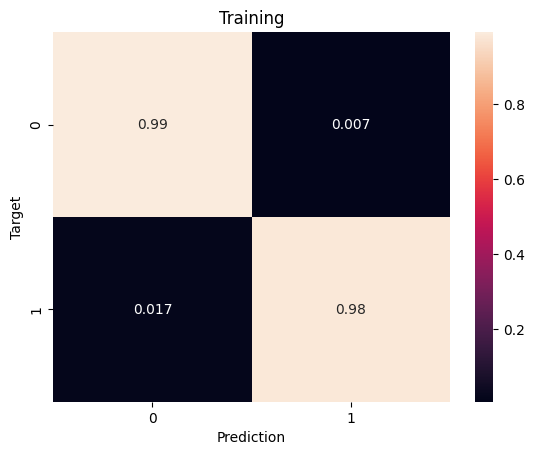

In [117]:
predict_and_plot(X_train, train_targets, 'Training')

0.9615384615384616


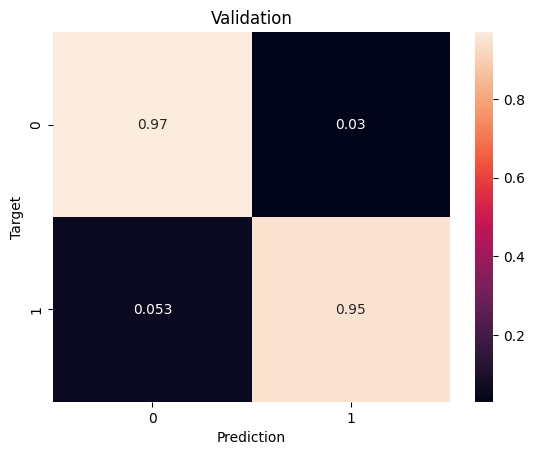

In [118]:
predict_and_plot(X_val, val_targets, 'Validation')

0.9824561403508771


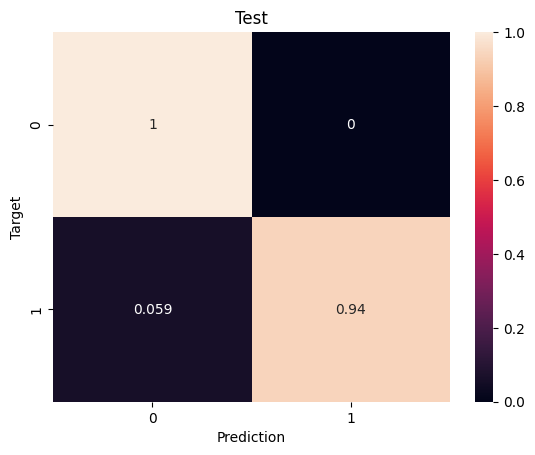

In [119]:
predict_and_plot(X_test, test_targets, 'Test')